In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from utils.dataloader import Dataloader

dataloader = Dataloader(data_dir="data/")

data = dataloader.load_all()
comprehensive_data = data["comprehensive_data"]
covid19_testing_record = data["covid19_testing_record"]
covid19_variants_found = data["covid19_variants_found"]
vaccinations_by_country = data["vaccinations_by_country"]
vaccination_by_manufacturer = data["vaccination_by_manufacturer"]

In [3]:
vaccination_by_manufacturer[vaccination_by_manufacturer["is_western_europe"]]["country"].unique()

array(['Belgium', 'France', 'Ireland', 'Luxembourg', 'Netherlands'],
      dtype=object)

## Distribution of Manufacturers

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\3998938153.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\3998938153.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\3998938153.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\3998938153.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(

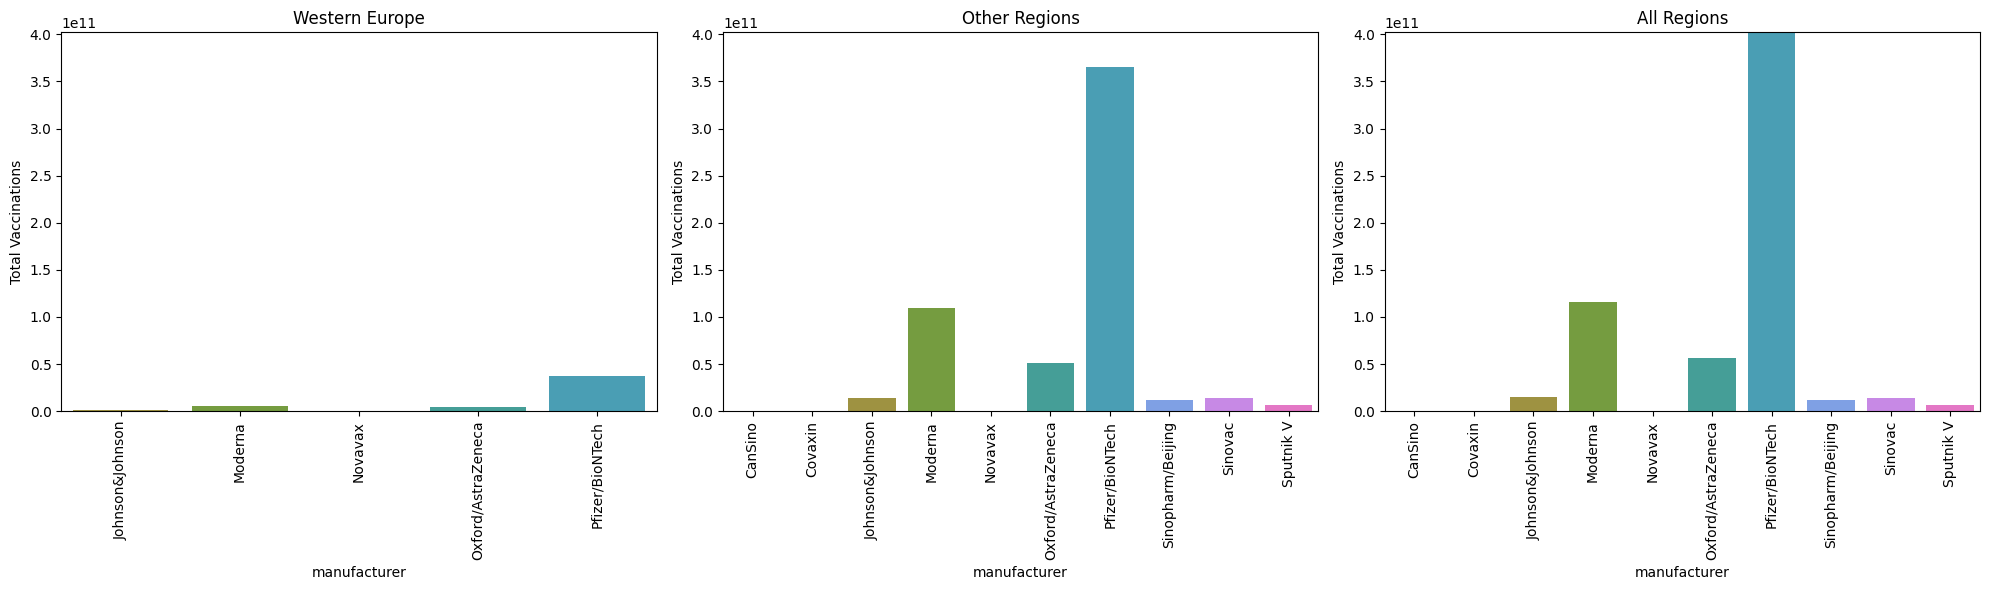

In [4]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby('manufacturer')['total_vaccinations'].sum()

# Define a consistent color palette for manufacturers
color_palette = sns.color_palette("husl", n_colors=len(all_data))
manufacturer_colors = dict(zip(all_data.index, color_palette))

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Get the max y value for consistent y-axis scale
max_y = max(western_data.max(), other_data.max(), all_data.max())

# Plot for Western Europe
sns.barplot(x=western_data.index, y=western_data.values, ax=ax1,
            hue=western_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in western_data.index])
ax1.set_title('Western Europe')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Total Vaccinations')
ax1.set_ylim(0, max_y)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot for Other Regions
sns.barplot(x=other_data.index, y=other_data.values, ax=ax2,
            hue=other_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in other_data.index])
ax2.set_title('Other Regions')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Total Vaccinations')
ax2.set_ylim(0, max_y)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Plot for All Regions
sns.barplot(x=all_data.index, y=all_data.values, ax=ax3,
            hue=all_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in all_data.index])
ax3.set_title('All Regions')
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel('Total Vaccinations')
ax3.set_ylim(0, max_y)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\150032742.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(all_manufacturers, rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\150032742.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_manufacturers, rotation=90)


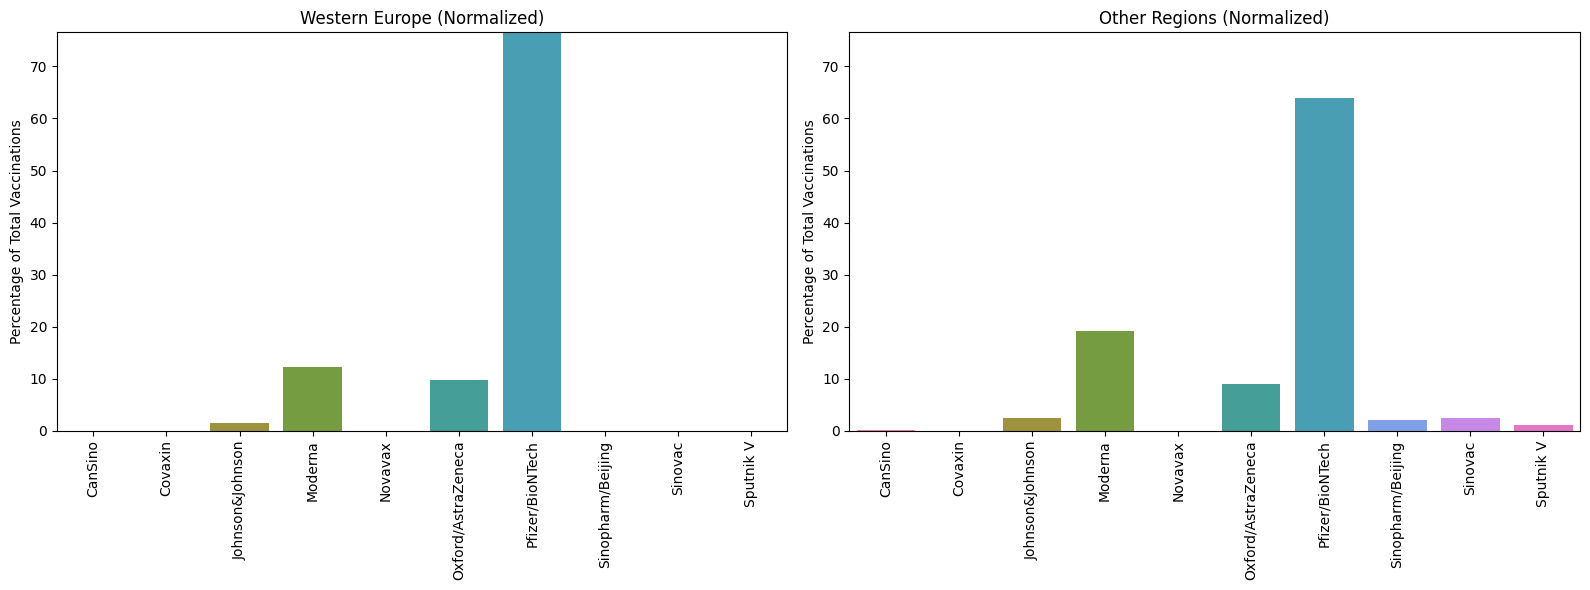

In [5]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

# Get all unique manufacturers
all_manufacturers = all_data.index.tolist()

# Normalize data by converting to percentages
western_data = (western_data / western_data.sum()) * 100
other_data = (other_data / other_data.sum()) * 100
all_data = (all_data / all_data.sum()) * 100

# Fill missing values with 0 for consistent x-axis
western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)
all_data = all_data.reindex(all_manufacturers, fill_value=0)

# Define a consistent color palette for manufacturers
color_palette = sns.color_palette("husl", n_colors=len(all_manufacturers))
manufacturer_colors = dict(zip(all_manufacturers, color_palette))

# Create three subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Get the max y value for consistent y-axis scale
max_y = max(western_data.max(), other_data.max(), all_data.max())

# Plot for Western Europe
sns.barplot(x=all_manufacturers, y=western_data.values, ax=ax1,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax1.set_title('Western Europe (Normalized)')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Percentage of Total Vaccinations')
ax1.set_ylim(0, max_y)
ax1.set_xticklabels(all_manufacturers, rotation=90)

# Plot for Other Regions
sns.barplot(x=all_manufacturers, y=other_data.values, ax=ax2,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax2.set_title('Other Regions (Normalized)')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Percentage of Total Vaccinations')
ax2.set_ylim(0, max_y)
ax2.set_xticklabels(all_manufacturers, rotation=90)

# # Plot for All Regions
# sns.barplot(x=all_manufacturers, y=all_data.values, ax=ax3,
#             hue=all_manufacturers, legend=False,
#             palette=[manufacturer_colors[m] for m in all_manufacturers])
# ax3.set_title('All Regions (Normalized)')
# ax3.tick_params(axis='x', rotation=90)
# ax3.set_ylabel('Percentage of Total Vaccinations')
# ax3.set_ylim(0, max_y)
# ax3.set_xticklabels(all_manufacturers, rotation=90)

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

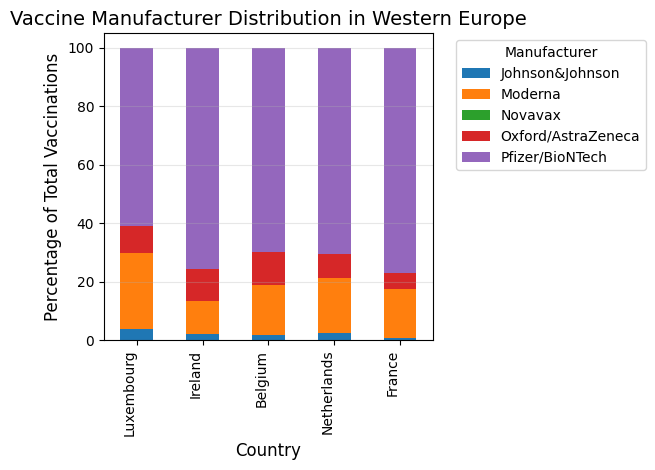

In [6]:
# Get Western European countries and their vaccine distributions
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']]

# Get the latest data for each country-manufacturer combination
latest_data = western_data.sort_values('date').groupby(['country', 'manufacturer']).last()
latest_data = latest_data.reset_index()

# Calculate percentage of vaccinations by manufacturer for each country
total_by_country = latest_data.groupby('country')['total_vaccinations'].sum()
latest_data['percentage'] = latest_data.apply(lambda x: (x['total_vaccinations'] / total_by_country[x['country']]) * 100, axis=1)

# Create a pivot table for easier plotting
pivot_data = latest_data.pivot(index='country', columns='manufacturer', values='percentage').fillna(0)

# Sort countries by total vaccinations
country_order = latest_data.groupby('country')['total_vaccinations'].sum().sort_values(ascending=True).index

# Plot the distribution
plt.figure(figsize=(15, 10))
pivot_data.reindex(country_order).plot(kind='bar', stacked=True)

plt.title('Vaccine Manufacturer Distribution in Western Europe', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1600x900 with 0 Axes>

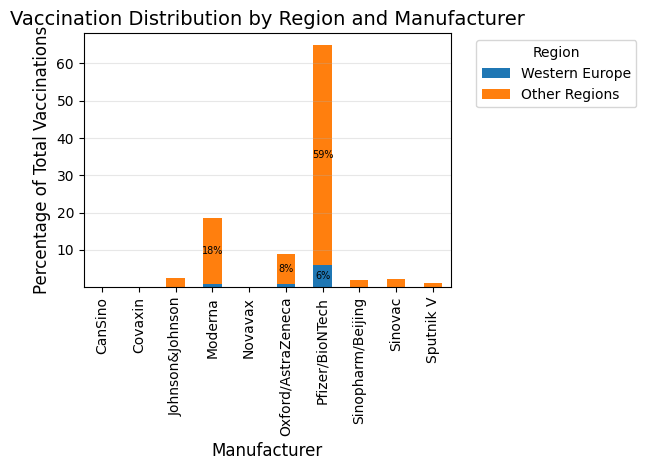

In [7]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

# Get all unique manufacturers
all_manufacturers = all_data.index.tolist()

# Normalize data by converting to percentages
western_data = (western_data / all_data.sum()) * 100
other_data = (other_data / all_data.sum()) * 100

# Fill missing values with 0 for consistent x-axis
western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Western Europe': western_data,
    'Other Regions': other_data
})

# Create a single figure
plt.figure(figsize=(16, 9))

# Create stacked bar plot
ax = plot_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Vaccination Distribution by Region and Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for c in ax.containers:
    # Add labels only for values >= 5%
    labels = [f'{v:.0f}%' if v >= 5 else '' for v in [rect.get_height() for rect in c]]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=7, color='black')

plt.tight_layout()
plt.show()


# VE fo each manufacturer

## Vaccination Performance Analysis by Manufacturer

We'll analyze manufacturer performance using several metrics:

1. **Total vaccinations**: Raw number of vaccinations administered by manufacturer
2. **Geographic reach**: Number of countries using each manufacturer's vaccines
3. **Market share**: Percentage of global vaccinations by manufacturer
4. **Temporal adoption**: Rate of vaccine adoption over time
5. **Regional performance**: Comparison of vaccine usage in Western Europe vs. other regions

In [8]:
# Examine the vaccination_by_manufacturer dataframe
print("Columns:", vaccination_by_manufacturer.columns.tolist())
print("\nFirst few rows:")
vaccination_by_manufacturer.head()

Columns: ['date', 'country', 'manufacturer', 'total_vaccinations', 'is_western_europe']

First few rows:


,date,country,manufacturer,total_vaccinations,is_western_europe
0,2021-02-05,Argentina,CanSino,3.0,False
1,2021-02-06,Argentina,CanSino,3.0,False
2,2021-02-07,Argentina,CanSino,3.0,False
3,2021-02-08,Argentina,CanSino,3.0,False
4,2021-02-09,Argentina,CanSino,3.0,False


In [9]:
# 1. Total vaccinations by manufacturer
total_by_manufacturer = vaccination_by_manufacturer.groupby('manufacturer')['total_vaccinations'].sum().sort_values(ascending=False)

# 2. Geographic reach: Number of countries using each manufacturer's vaccines
geographic_reach = vaccination_by_manufacturer.groupby('manufacturer')['country'].nunique().sort_values(ascending=False)

# Create a DataFrame with both metrics
performance_df = pd.DataFrame({
    'Total Vaccinations': total_by_manufacturer,
    'Countries Reached': geographic_reach
})

# Calculate market share percentage
performance_df['Market Share (%)'] = (performance_df['Total Vaccinations'] / performance_df['Total Vaccinations'].sum() * 100).round(2)

# Sort by total vaccinations
performance_df = performance_df.sort_values('Total Vaccinations', ascending=False)

# Display the performance metrics
print("\nVaccination Performance by Manufacturer:")
performance_df


Vaccination Performance by Manufacturer:


,Total Vaccinations,Countries Reached,Market Share (%)
manufacturer,,,
Pfizer/BioNTech,4.022002e+11,43,64.84
Moderna,1.157790e+11,37,18.67
Oxford/AstraZeneca,5.586027e+10,37,9.01
Johnson&Johnson,1.498298e+10,35,2.42
Sinovac,1.340758e+10,8,2.16
Sinopharm/Beijing,1.157510e+10,7,1.87
Sputnik V,6.190721e+09,4,1.00
CanSino,2.713977e+08,3,0.04
Novavax,8.395152e+06,18,0.00


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\1648546527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['Total Vaccinations'],
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\1648546527.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['Countries Reached'],


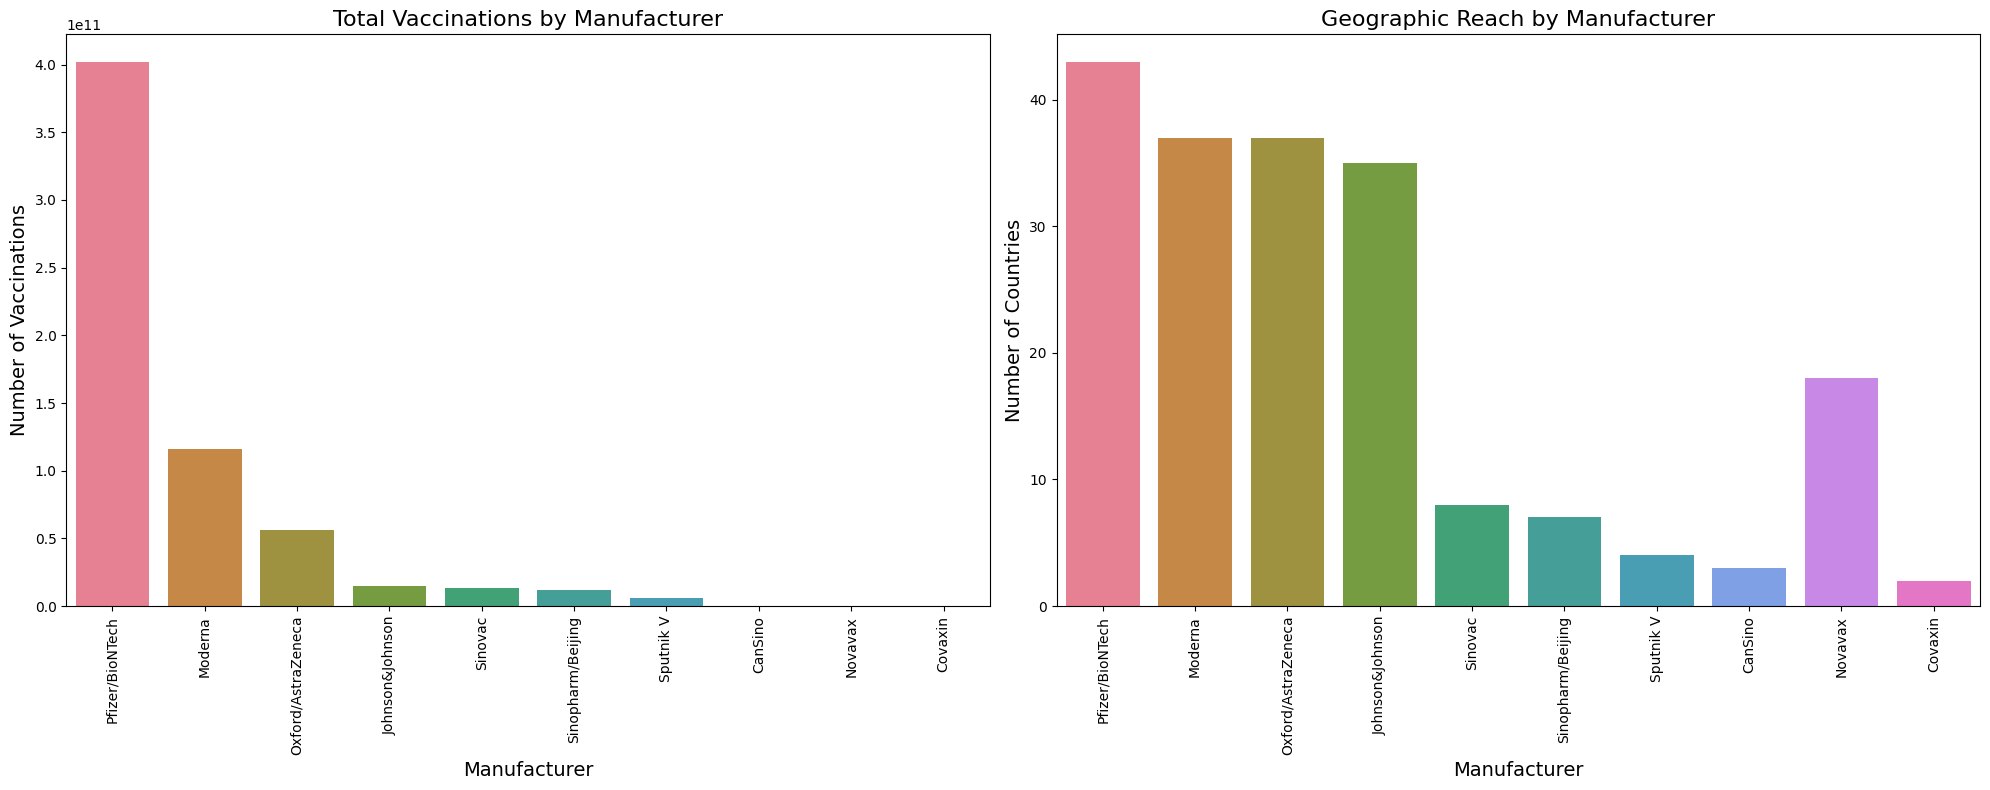

In [10]:
# Create a color palette
colors = sns.color_palette('husl', n_colors=len(performance_df))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. Plot total vaccinations
sns.barplot(x=performance_df.index, y=performance_df['Total Vaccinations'], 
            palette=colors, ax=ax1)
ax1.set_title('Total Vaccinations by Manufacturer', fontsize=16)
ax1.set_ylabel('Number of Vaccinations', fontsize=14)
ax1.set_xlabel('Manufacturer', fontsize=14)
ax1.tick_params(axis='x', rotation=90)

# 2. Plot geographic reach
sns.barplot(x=performance_df.index, y=performance_df['Countries Reached'], 
            palette=colors, ax=ax2)
ax2.set_title('Geographic Reach by Manufacturer', fontsize=16)
ax2.set_ylabel('Number of Countries', fontsize=14)
ax2.set_xlabel('Manufacturer', fontsize=14)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

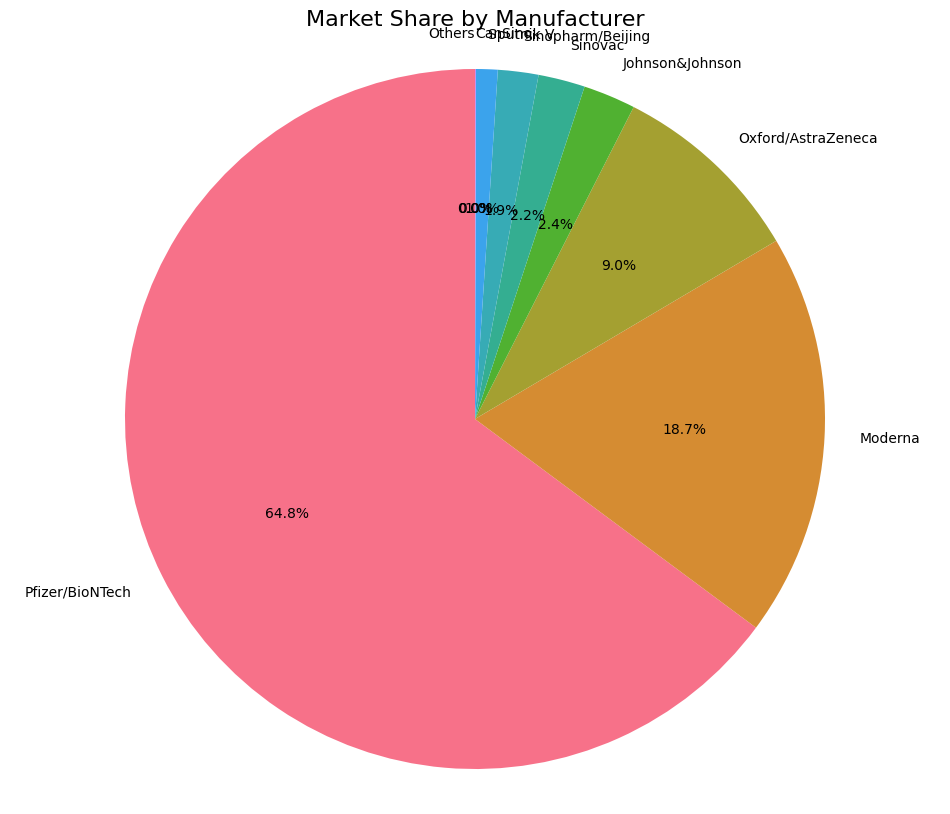

In [11]:
# Create a pie chart for market share
plt.figure(figsize=(12, 10))

# Keep only the top 8 manufacturers, group the rest as "Others"
top_n = 8
top_manufacturers = performance_df.iloc[:top_n].copy()
others = pd.DataFrame({
    'Total Vaccinations': [performance_df.iloc[top_n:]['Total Vaccinations'].sum()],
    'Market Share (%)': [performance_df.iloc[top_n:]['Market Share (%)'].sum()]
}, index=['Others'])

pie_data = pd.concat([top_manufacturers, others])

# Create a pie chart
plt.pie(pie_data['Market Share (%)'], labels=pie_data.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('husl', n_colors=len(pie_data)))
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Market Share by Manufacturer', fontsize=16)
plt.show()

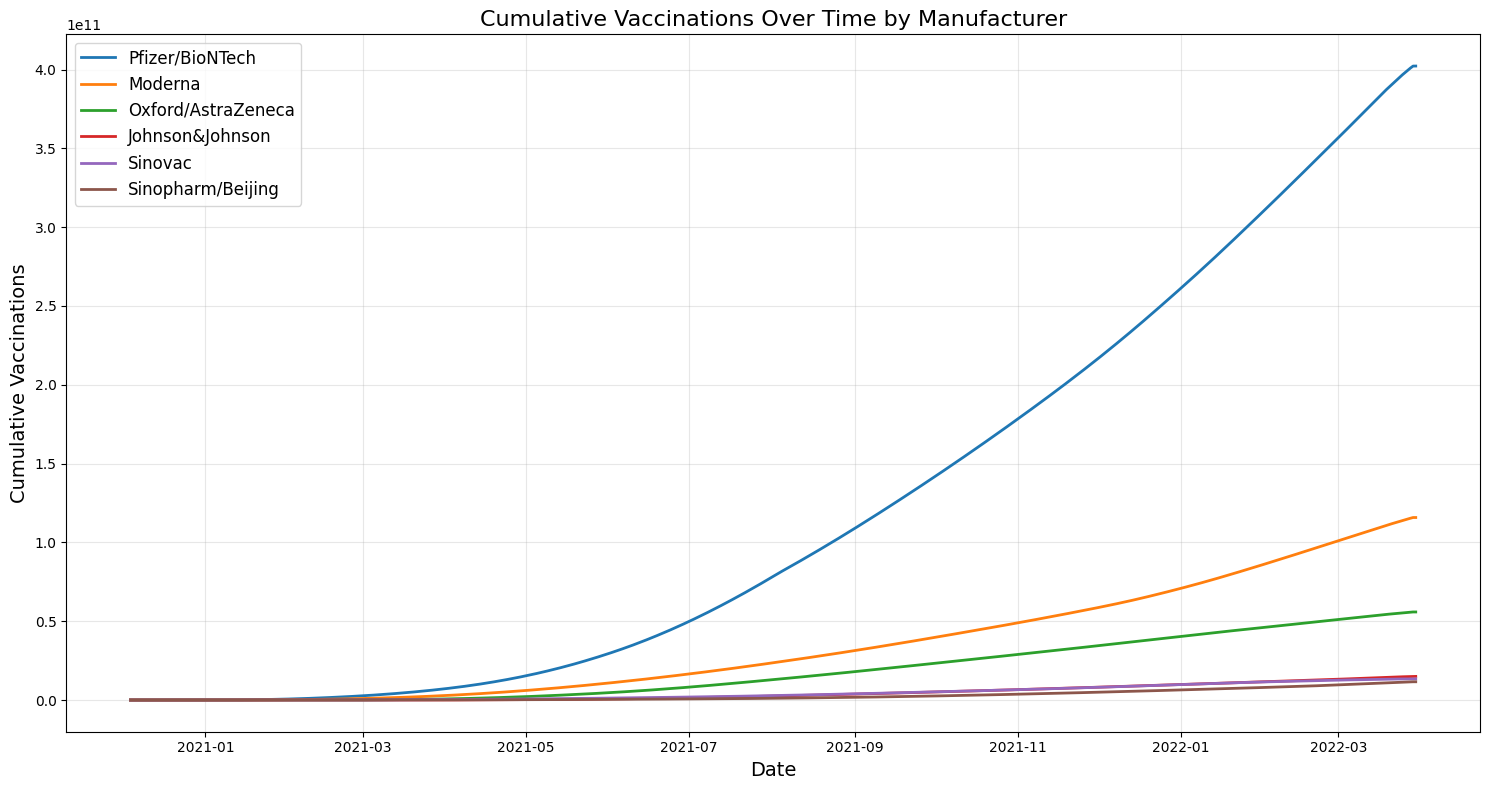

In [12]:
# Analyze vaccine adoption over time for top manufacturers
# Convert date to datetime format
vaccination_by_manufacturer['date'] = pd.to_datetime(vaccination_by_manufacturer['date'])

# Get top 6 manufacturers by total vaccinations
top_manufacturers = total_by_manufacturer.nlargest(6).index.tolist()

# Group by date and manufacturer, and sum vaccinations
temporal_data = vaccination_by_manufacturer[vaccination_by_manufacturer['manufacturer'].isin(top_manufacturers)]
temporal_data = temporal_data.groupby(['date', 'manufacturer'])['total_vaccinations'].sum().reset_index()

# Create a cumulative sum for each manufacturer over time
cumulative_data = temporal_data.pivot(index='date', columns='manufacturer', values='total_vaccinations')
cumulative_data = cumulative_data.fillna(0).cumsum()

# Plot the adoption curves
plt.figure(figsize=(15, 8))
for manufacturer in top_manufacturers:
    if manufacturer in cumulative_data.columns:
        plt.plot(cumulative_data.index, cumulative_data[manufacturer], label=manufacturer, linewidth=2)

plt.title('Cumulative Vaccinations Over Time by Manufacturer', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Vaccinations', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
# Regional performance comparison
# Calculate total vaccinations for each manufacturer by region
western_europe = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']]
other_regions = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']]

# Group by manufacturer and calculate total vaccinations for each region
western_europe_totals = western_europe.groupby('manufacturer')['total_vaccinations'].sum()
other_regions_totals = other_regions.groupby('manufacturer')['total_vaccinations'].sum()

# Create a DataFrame with both metrics
regional_performance = pd.DataFrame({
    'Western Europe': western_europe_totals,
    'Other Regions': other_regions_totals
})

# Calculate the percentage share in each region
regional_performance['Western Europe (%)'] = (regional_performance['Western Europe'] / regional_performance['Western Europe'].sum() * 100).round(2)
regional_performance['Other Regions (%)'] = (regional_performance['Other Regions'] / regional_performance['Other Regions'].sum() * 100).round(2)

# Sort by total vaccinations
regional_performance = regional_performance.fillna(0).sort_values('Western Europe', ascending=False)

# Display the regional performance metrics
print("\nRegional Performance by Manufacturer:")
regional_performance


Regional Performance by Manufacturer:


,Western Europe,Other Regions,Western Europe (%),Other Regions (%)
manufacturer,,,,
Pfizer/BioNTech,3.699752e+10,3.652027e+11,76.56,63.85
Moderna,5.902175e+09,1.098768e+11,12.21,19.21
Oxford/AstraZeneca,4.707398e+09,5.115287e+10,9.74,8.94
Johnson&Johnson,7.173895e+08,1.426559e+10,1.48,2.49
Novavax,5.204000e+03,8.389948e+06,0.00,0.00
CanSino,0.000000e+00,2.713977e+08,0.00,0.05
Covaxin,0.000000e+00,4.667000e+03,0.00,0.00
Sinopharm/Beijing,0.000000e+00,1.157510e+10,0.00,2.02
Sinovac,0.000000e+00,1.340758e+10,0.00,2.34


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\629064272.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_western.index, y=top_western['Western Europe (%)'],
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\629064272.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_other.index, y=top_other['Other Regions (%)'],


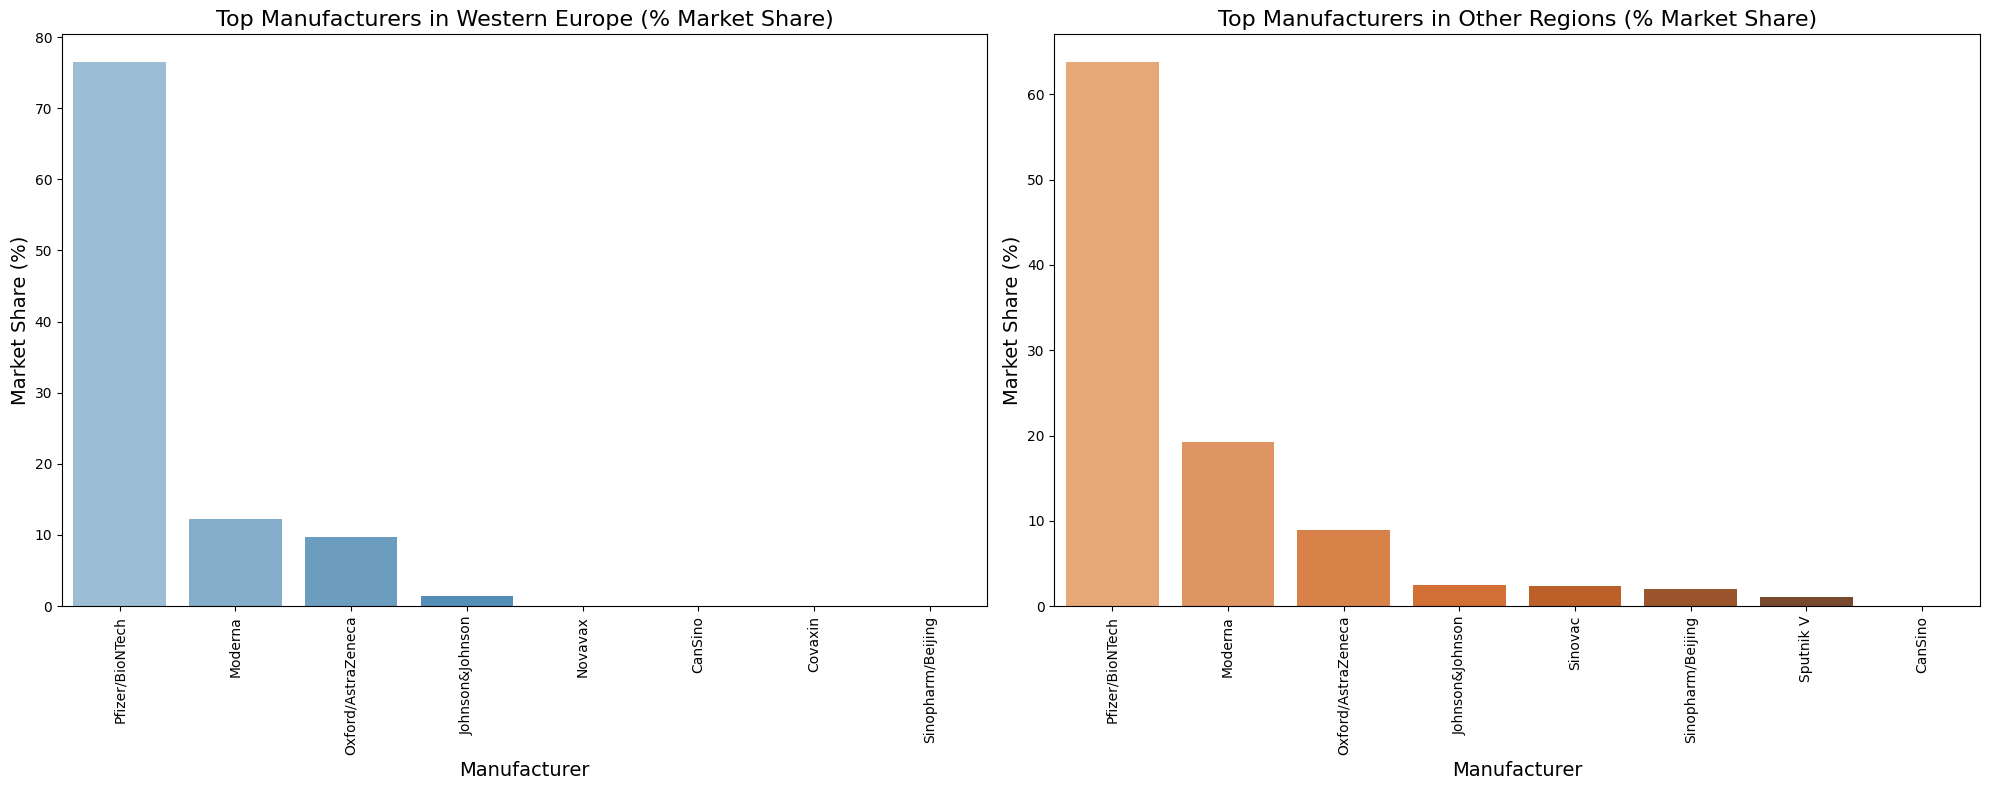

In [14]:
# Create a figure with two subplots for regional performance comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Filter for top manufacturers for cleaner visualization
top_n = 8
top_western = regional_performance.nlargest(top_n, 'Western Europe')
top_other = regional_performance.nlargest(top_n, 'Other Regions')

# Plot for Western Europe
sns.barplot(x=top_western.index, y=top_western['Western Europe (%)'], 
            palette=sns.color_palette('Blues_d', n_colors=len(top_western)), ax=ax1)
ax1.set_title('Top Manufacturers in Western Europe (% Market Share)', fontsize=16)
ax1.set_ylabel('Market Share (%)', fontsize=14)
ax1.set_xlabel('Manufacturer', fontsize=14)
ax1.tick_params(axis='x', rotation=90)

# Plot for Other Regions
sns.barplot(x=top_other.index, y=top_other['Other Regions (%)'], 
            palette=sns.color_palette('Oranges_d', n_colors=len(top_other)), ax=ax2)
ax2.set_title('Top Manufacturers in Other Regions (% Market Share)', fontsize=16)
ax2.set_ylabel('Market Share (%)', fontsize=14)
ax2.set_xlabel('Manufacturer', fontsize=14)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

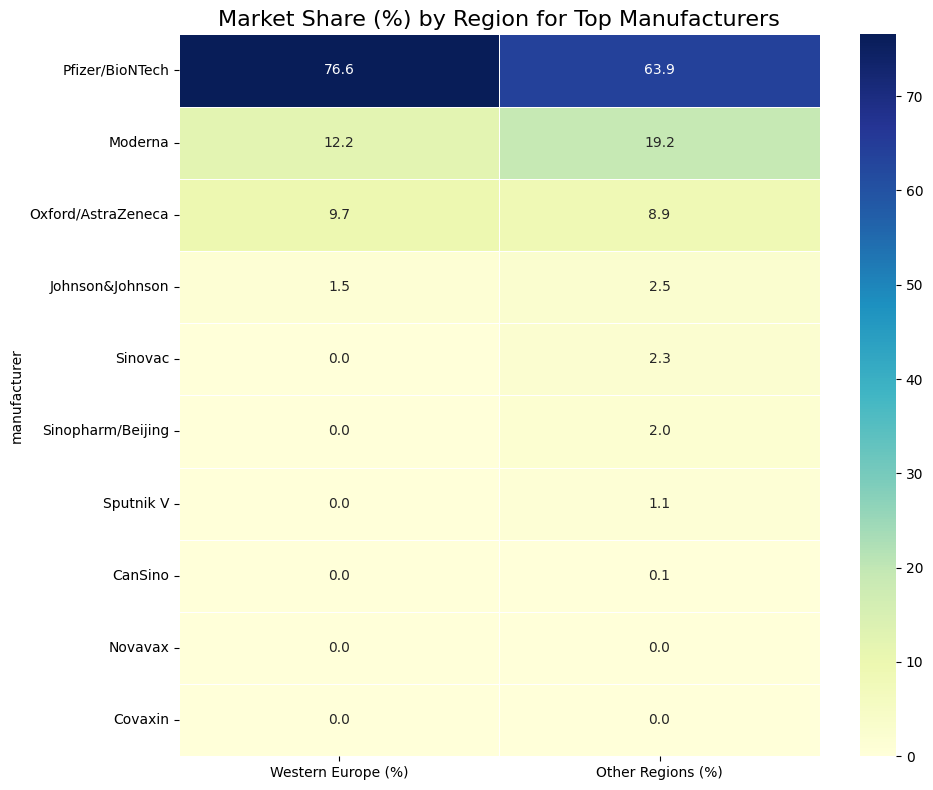

In [15]:
# Create a heatmap to compare market share percentages across regions
# Select top 10 manufacturers by total global vaccinations
top_manufacturers = performance_df.head(10).index.tolist()
regional_heatmap_data = regional_performance.loc[top_manufacturers, ['Western Europe (%)', 'Other Regions (%)']]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(regional_heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Market Share (%) by Region for Top Manufacturers', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\4192823871.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effectiveness_df.index, y=effectiveness_df['Vaccinations per Country'],


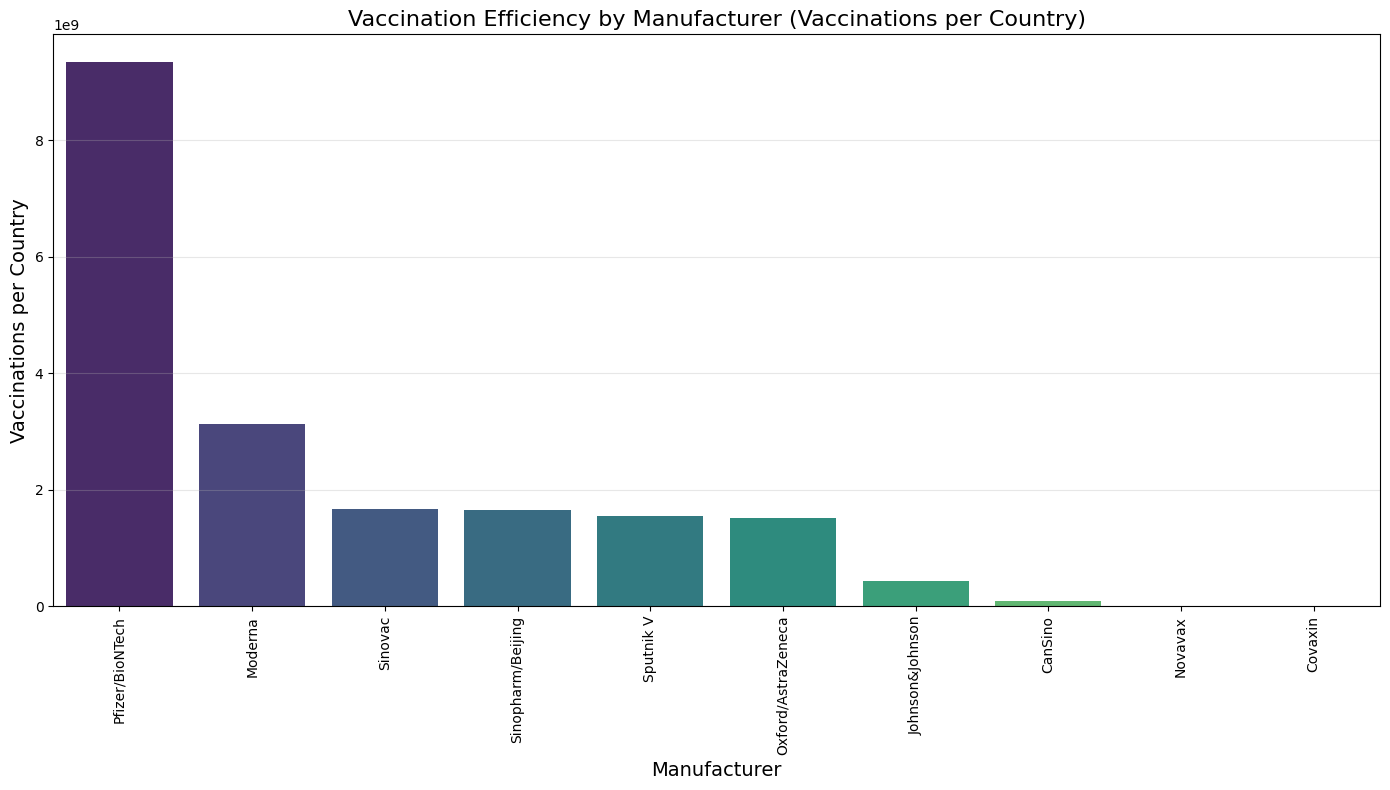

In [16]:
# Create a performance indicator: Effectiveness ratio
# Effectiveness ratio = Vaccinations per country (reach efficiency)
performance_df['Vaccinations per Country'] = (performance_df['Total Vaccinations'] / performance_df['Countries Reached']).round(0)

# Sort by the new metric
effectiveness_df = performance_df.sort_values('Vaccinations per Country', ascending=False)

# Plot the effectiveness ratio
plt.figure(figsize=(14, 8))
sns.barplot(x=effectiveness_df.index, y=effectiveness_df['Vaccinations per Country'], 
            palette=sns.color_palette('viridis', n_colors=len(effectiveness_df)))
plt.title('Vaccination Efficiency by Manufacturer (Vaccinations per Country)', fontsize=16)
plt.ylabel('Vaccinations per Country', fontsize=14)
plt.xlabel('Manufacturer', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Create a composite performance score
# Normalize each metric to a 0-100 scale
from sklearn.preprocessing import MinMaxScaler

# Select the metrics to include in the performance score
metrics = ['Total Vaccinations', 'Countries Reached', 'Vaccinations per Country']

# Create a copy of the data for scaling
scaled_df = performance_df.copy()

# Scale each metric to 0-100
scaler = MinMaxScaler(feature_range=(0, 100))
for metric in metrics:
    scaled_df[f'{metric} (scaled)'] = scaler.fit_transform(performance_df[[metric]]).flatten()

# Calculate the composite score (equal weighting for simplicity)
scaled_df['Performance Score'] = scaled_df[[f'{metric} (scaled)' for metric in metrics]].mean(axis=1).round(2)

# Sort by the performance score
scaled_df = scaled_df.sort_values('Performance Score', ascending=False)

# Display the performance scores
print("\nOverall Performance Score by Manufacturer:")
scaled_df[['Total Vaccinations', 'Countries Reached', 'Vaccinations per Country', 'Performance Score']]


Overall Performance Score by Manufacturer:


,Total Vaccinations,Countries Reached,Vaccinations per Country,Performance Score
manufacturer,,,,
Pfizer/BioNTech,4.022002e+11,43,9.353494e+09,100.00
Moderna,1.157790e+11,37,3.129163e+09,49.20
Oxford/AstraZeneca,5.586027e+10,37,1.509737e+09,38.47
Johnson&Johnson,1.498298e+10,35,4.280851e+08,29.60
Novavax,8.395152e+06,18,4.663970e+05,13.01
Sinovac,1.340758e+10,8,1.675948e+09,11.96
Sinopharm/Beijing,1.157510e+10,7,1.653586e+09,10.92
Sputnik V,6.190721e+09,4,1.547680e+09,7.65
CanSino,2.713977e+08,3,9.046589e+07,1.16


In [18]:
# Examine the covid19_testing_record dataset
print("Columns in covid19_testing_record:", covid19_testing_record.columns.tolist())
print("\nFirst few rows of covid19_testing_record:")
covid19_testing_record.head()

Columns in covid19_testing_record: ['date', 'entity', 'iso_code', 'source_url', 'source_label', 'notes', 'daily_change', 'total_tests', 'total_tests_per_thousand', 'daily_change_per_thousand', 'smoothed_daily_change', 'smoothed_daily_change_per_thousand', 'positive_rate', 'tests_per_confirm_case', 'country', 'tested_type', 'is_western_europe']

First few rows of covid19_testing_record:


,date,entity,iso_code,source_url,source_label,notes,daily_change,total_tests,total_tests_per_thousand,daily_change_per_thousand,smoothed_daily_change,smoothed_daily_change_per_thousand,positive_rate,tests_per_confirm_case,country,tested_type,is_western_europe
0,2020-02-25,Albania - tests performed,ALB,https://shendetesia.gov.al/koronavirusi-mshms-...,Ministry of Health and Social Protection,NaN,8.0,8.0,0.003,0.003,4.0,0.001,0.0848,11.8,Albania,tests performed,False
1,2020-02-26,Albania - tests performed,ALB,https://shendetesia.gov.al/fond-shtese-per-mas...,Ministry of Health and Social Protection,NaN,5.0,13.0,0.005,0.002,4.0,0.001,0.0848,11.8,Albania,tests performed,False
2,2020-02-27,Albania - tests performed,ALB,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,4.0,17.0,0.006,0.001,4.0,0.001,0.0848,11.8,Albania,tests performed,False
3,2020-02-28,Albania - tests performed,ALB,http://shendetesia.gov.al/manastirliu-asnje-ra...,Ministry of Health and Social Protection,NaN,1.0,18.0,0.006,0.000,4.0,0.001,0.0848,11.8,Albania,tests performed,False
4,2020-02-29,Albania - tests performed,ALB,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,8.0,26.0,0.009,0.003,4.0,0.001,0.0848,11.8,Albania,tests performed,False


In [19]:
# Examine the comprehensive_data dataset
print("Columns in comprehensive_data:", comprehensive_data.columns.tolist())
print("\nFirst few rows of comprehensive_data:")
comprehensive_data.head(3)

Columns in comprehensive_data: ['ID', 'country', 'confirmed_cases', 'deaths_cases', 'recovered_cases', 'is_western_europe']

First few rows of comprehensive_data:


,ID,country,confirmed_cases,deaths_cases,recovered_cases,is_western_europe
0,1.0,Peru,4524748.0,220831.0,4303917.0,False
1,2.0,Bulgaria,1329266.0,38700.0,1290566.0,False
2,3.0,Bosnia And Herzegovina,403638.0,16388.0,387250.0,False


## Enhanced Vaccination Performance Analysis

Now we'll incorporate testing data to better evaluate vaccine manufacturer performance. We'll create several new metrics:

1. **Testing-to-Vaccination Ratio**: How testing volume relates to vaccination in countries using each manufacturer
2. **Positivity Rate Analysis**: Compare positivity rates in regions dominated by different manufacturers
3. **Tests per Confirmed Case**: Analyze effectiveness through testing efficiency in countries using different vaccines
4. **Pre vs Post Vaccination Testing Patterns**: Analyze changes in testing needs before and after vaccination campaigns

In [20]:
# Prepare the data - convert date columns to datetime format
covid19_testing_record['date'] = pd.to_datetime(covid19_testing_record['date'])
vaccination_by_manufacturer['date'] = pd.to_datetime(vaccination_by_manufacturer['date'])

# Filter data to a common time period where we have both testing and vaccination data
# First vaccination data starts around December 2020
min_vax_date = vaccination_by_manufacturer['date'].min()
max_vax_date = vaccination_by_manufacturer['date'].max()

# Filter testing data to the same period
filtered_testing = covid19_testing_record[(covid19_testing_record['date'] >= min_vax_date) & 
                                          (covid19_testing_record['date'] <= max_vax_date)]

print(f"Vaccination data period: {min_vax_date.date()} to {max_vax_date.date()}")
print(f"Number of testing records in this period: {len(filtered_testing)}")
print(f"Number of vaccination records: {len(vaccination_by_manufacturer)}")

Vaccination data period: 2020-12-04 to 2022-03-30
Number of testing records in this period: 44564
Number of vaccination records: 71363


In [21]:
# Determine the dominant manufacturer for each country
# This will help us attribute testing performance to specific vaccines

# Calculate total vaccinations by country and manufacturer
country_manu_totals = vaccination_by_manufacturer.groupby(['country', 'manufacturer'])['total_vaccinations'].sum().reset_index()

# Find the dominant manufacturer for each country
dominant_manufacturer = country_manu_totals.loc[country_manu_totals.groupby('country')['total_vaccinations'].idxmax()]
dominant_manufacturer = dominant_manufacturer[['country', 'manufacturer', 'total_vaccinations']]
dominant_manufacturer = dominant_manufacturer.rename(columns={'manufacturer': 'dominant_manufacturer',
                                                             'total_vaccinations': 'dominant_manufacturer_vaccinations'})

# Display the results
print("Dominant vaccine manufacturer by country:")
dominant_manufacturer.head(10)

Dominant vaccine manufacturer by country:


,country,dominant_manufacturer,dominant_manufacturer_vaccinations
4,Argentina,Sinopharm/Beijing,5.713239e+09
10,Austria,Pfizer/BioNTech,3.146521e+09
15,Belgium,Pfizer/BioNTech,4.140375e+09
19,Bulgaria,Pfizer/BioNTech,5.733727e+08
23,Chile,Sinovac,7.421275e+09
28,Croatia,Pfizer/BioNTech,9.042532e+08
33,Cyprus,Pfizer/BioNTech,2.621849e+08
38,Czechia,Pfizer/BioNTech,3.441540e+09
42,Denmark,Pfizer/BioNTech,2.402414e+09
46,Ecuador,Sinovac,2.561852e+09


In [22]:
# Merge testing data with dominant manufacturer information
# First get testing data aggregated by country

# Get average testing metrics by country
avg_testing_by_country = filtered_testing.groupby('country').agg({
    'total_tests': 'max',  # Maximum total tests performed
    'positive_rate': 'mean',  # Average positivity rate during vaccination period
    'tests_per_confirm_case': 'mean'  # Average tests per confirmed case
}).reset_index()

# Merge with dominant manufacturer data
country_performance = pd.merge(dominant_manufacturer, avg_testing_by_country, on='country', how='inner')

# Display the merged data
print("Country testing metrics with dominant manufacturer:")
country_performance.head()

Country testing metrics with dominant manufacturer:



,country,dominant_manufacturer,dominant_manufacturer_vaccinations,total_tests,positive_rate,tests_per_confirm_case
0,Argentina,Sinopharm/Beijing,5.713239e+09,26431302.0,0.145563,13.759016
1,Austria,Pfizer/BioNTech,3.146521e+09,114403886.0,0.008584,543.965591
2,Belgium,Pfizer/BioNTech,4.140375e+09,25681873.0,0.065292,22.010541
3,Bulgaria,Pfizer/BioNTech,5.733727e+08,6828318.0,0.104187,33.397574
4,Chile,Sinovac,7.421275e+09,25931660.0,0.058587,31.134771


In [23]:
# Calculate vaccination effectiveness metrics

# Calculate tests-to-vaccination ratio
country_performance['tests_to_vaccination_ratio'] = country_performance['total_tests'] / country_performance['dominant_manufacturer_vaccinations']

# Higher tests per confirmed case indicates more testing needed to find a case (may suggest better vaccine performance)
# Lower positivity rate may indicate more effective vaccination campaign
# Group by dominant manufacturer and calculate averages
manufacturer_test_performance = country_performance.groupby('dominant_manufacturer').agg({
    'country': 'count',  # Count of countries using this manufacturer as dominant one
    'positive_rate': 'mean',  # Average positivity rate
    'tests_per_confirm_case': 'mean',  # Average tests per confirmed case
    'tests_to_vaccination_ratio': 'mean',  # Tests needed per vaccination
    'total_tests': 'sum',  # Total tests across countries using this manufacturer
    'dominant_manufacturer_vaccinations': 'sum'  # Total vaccinations
}).rename(columns={'country': 'countries_count'}).reset_index()

# Sort by tests per confirmed case (higher is better)
manufacturer_test_performance = manufacturer_test_performance.sort_values('tests_per_confirm_case', ascending=False)

print("Vaccine Manufacturer Performance with Testing Metrics:")
manufacturer_test_performance

Vaccine Manufacturer Performance with Testing Metrics:


,dominant_manufacturer,countries_count,positive_rate,tests_per_confirm_case,tests_to_vaccination_ratio,total_tests,dominant_manufacturer_vaccinations
1,Pfizer/BioNTech,35,0.074799,507.059773,0.016395,1.468371e+09,2.542801e+11
0,Moderna,2,0.066169,34.764015,0.006704,1.311418e+07,2.337886e+09
3,Sinovac,3,0.127098,22.021915,0.002748,3.205332e+07,1.103073e+10
2,Sinopharm/Beijing,2,0.146784,13.552089,0.005430,3.113414e+07,6.467688e+09


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\184974494.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dominant_manufacturer', y='tests_per_confirm_case',


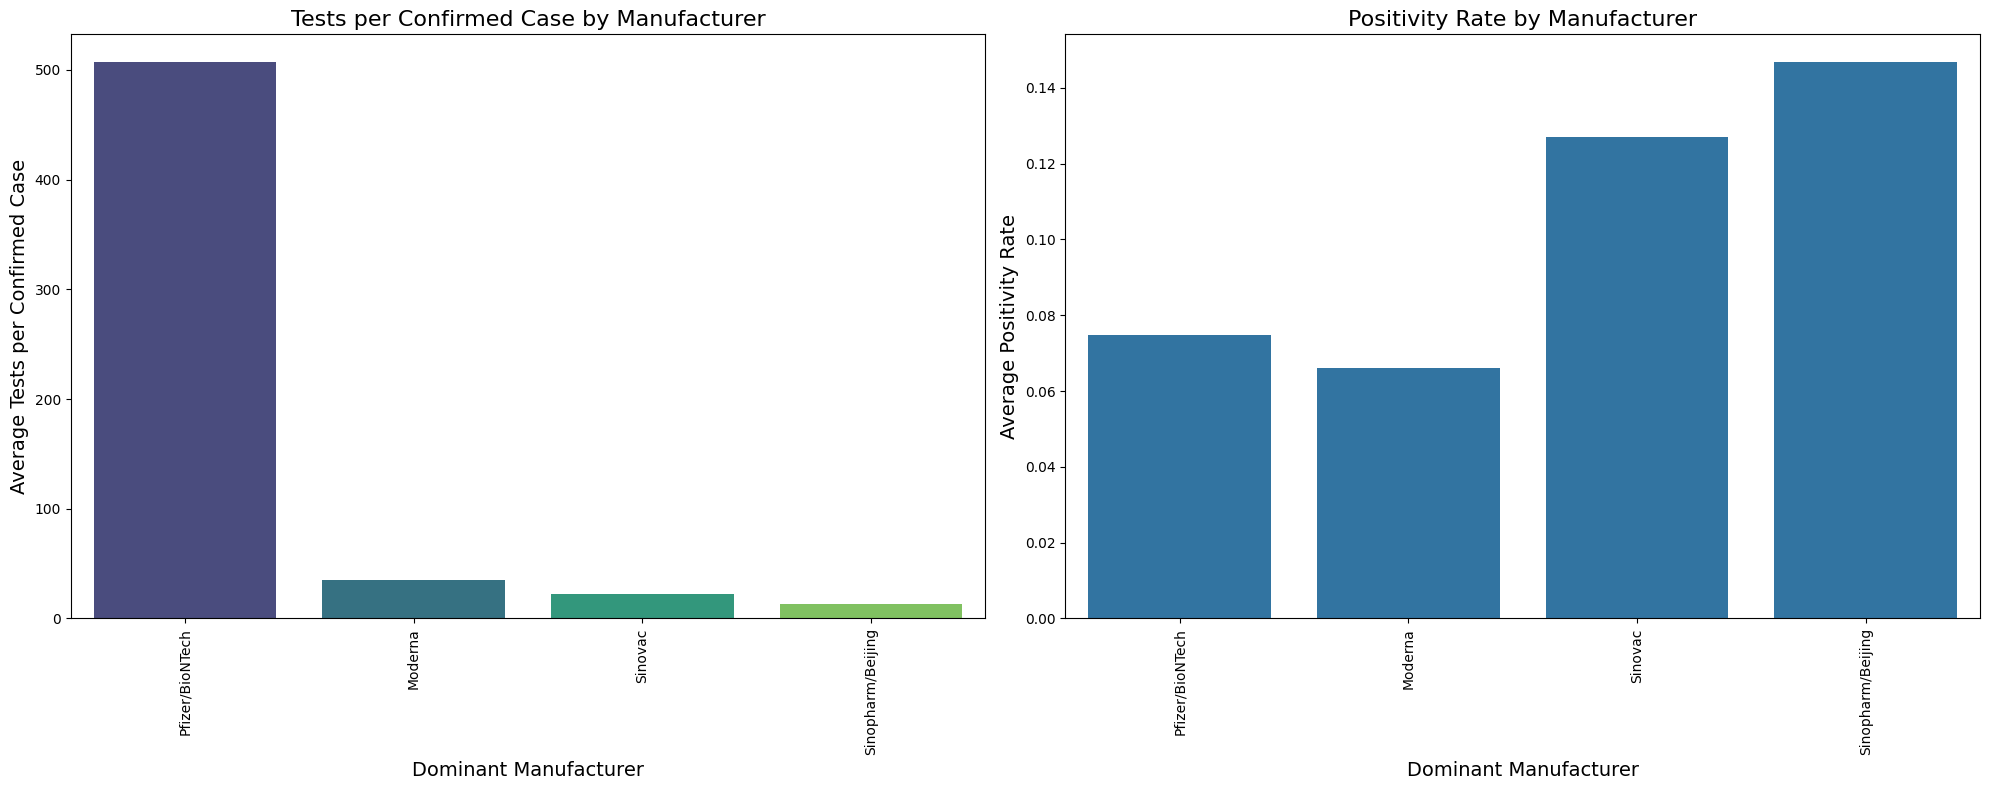

In [25]:
# Visualize testing-related performance metrics by manufacturer

# 1. Tests per confirmed case by manufacturer (higher is better, indicates fewer positive cases)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Create a color palette
colors1 = sns.color_palette('viridis', n_colors=len(manufacturer_test_performance))

# Plot tests per confirmed case
sns.barplot(x='dominant_manufacturer', y='tests_per_confirm_case', 
            data=manufacturer_test_performance, palette=colors1, ax=ax1)
ax1.set_title('Tests per Confirmed Case by Manufacturer', fontsize=16)
ax1.set_ylabel('Average Tests per Confirmed Case', fontsize=14)
ax1.set_xlabel('Dominant Manufacturer', fontsize=14)
ax1.tick_params(axis='x', rotation=90)

# 2. Plot geographic reach
sns.barplot(x='dominant_manufacturer', y='positive_rate', 
            data=manufacturer_test_performance, ax=ax2)
ax2.set_title('Positivity Rate by Manufacturer', fontsize=16)
ax2.set_ylabel('Average Positivity Rate', fontsize=14)
ax2.set_xlabel('Dominant Manufacturer', fontsize=14)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\1680214556.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_testing_data['dominant_manufacturer'] = top_testing_data['country'].map(country_to_manufacturer)


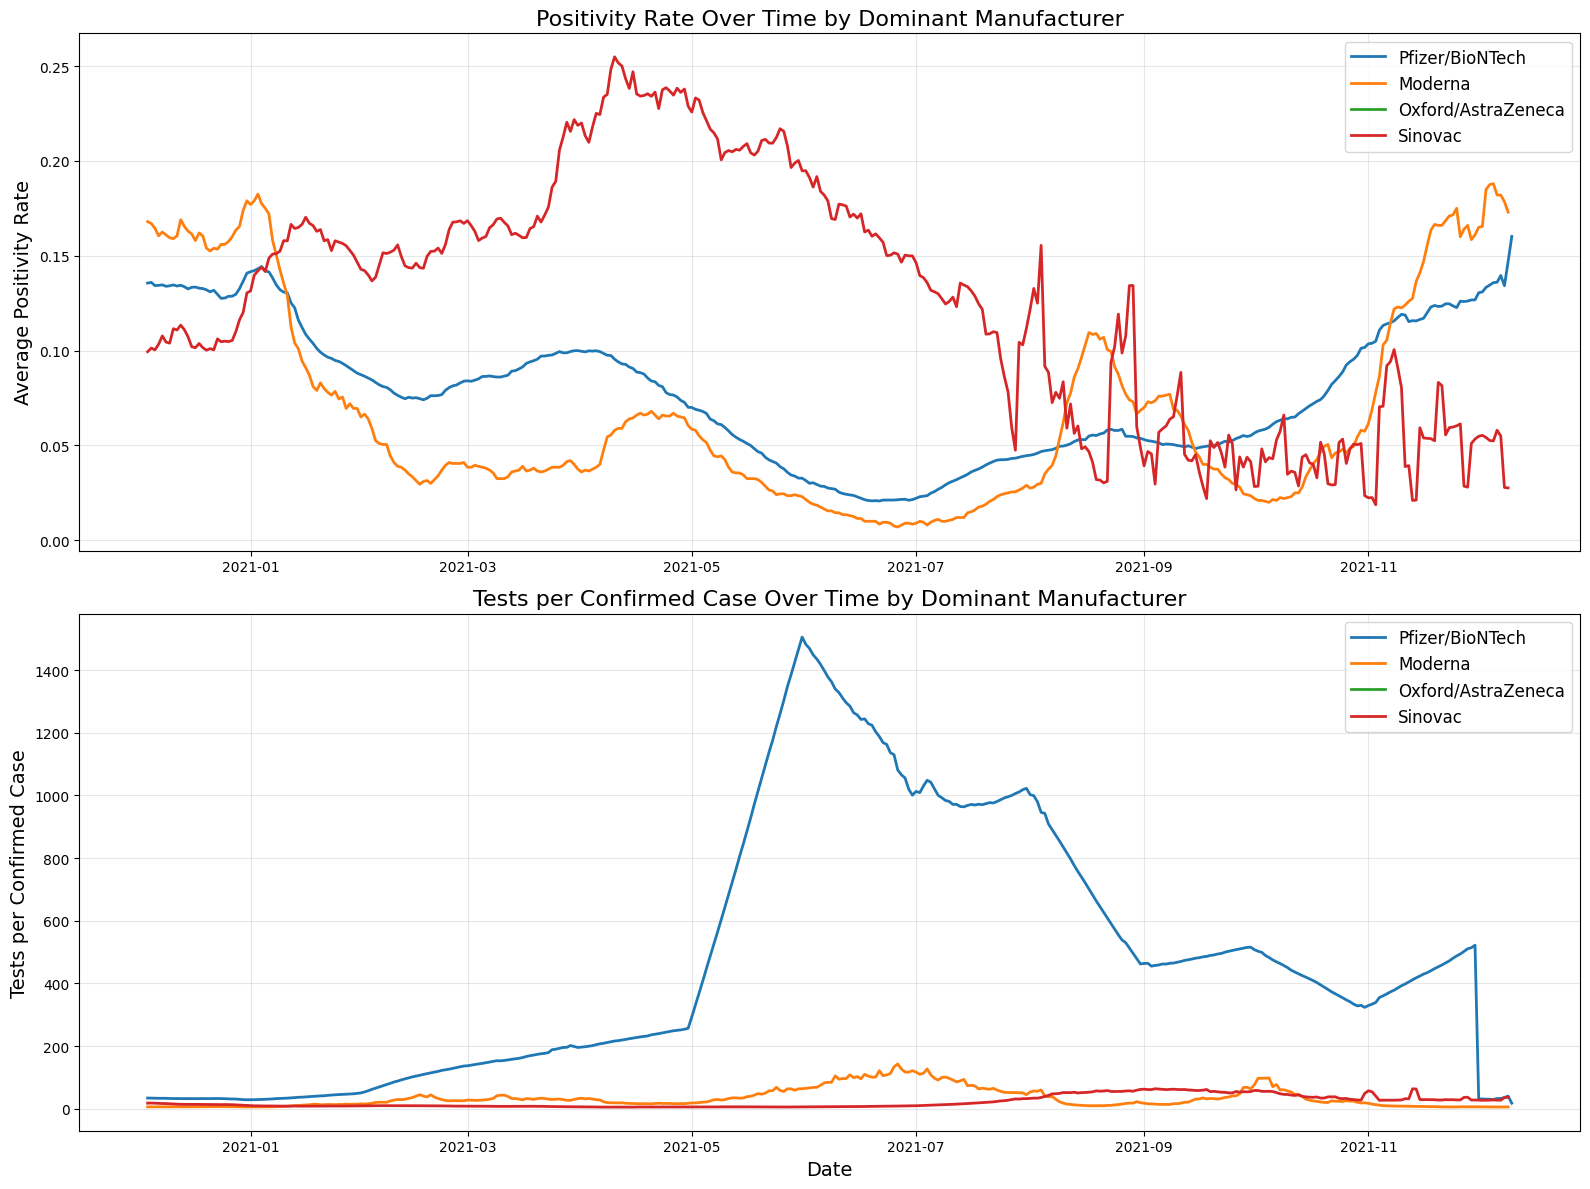

In [26]:
# Analyze testing patterns over time for countries with each dominant vaccine
# Filter for top manufacturers to keep visualization clear
top_manufacturers = ['Pfizer/BioNTech', 'Moderna', 'Oxford/AstraZeneca', 'Sinovac']

# Get list of countries with these dominant manufacturers
top_countries = country_performance[country_performance['dominant_manufacturer'].isin(top_manufacturers)]['country'].unique()

# Filter testing data for these countries
top_testing_data = filtered_testing[filtered_testing['country'].isin(top_countries)]

# Create a mapping from country to dominant manufacturer
country_to_manufacturer = dict(zip(country_performance['country'], country_performance['dominant_manufacturer']))

# Add dominant manufacturer to testing data
top_testing_data['dominant_manufacturer'] = top_testing_data['country'].map(country_to_manufacturer)

# Filter to only include countries with the top manufacturers
top_testing_data = top_testing_data[top_testing_data['dominant_manufacturer'].isin(top_manufacturers)]

# Group by date and dominant manufacturer to see testing trends
testing_trends = top_testing_data.groupby(['date', 'dominant_manufacturer']).agg({
    'positive_rate': 'mean',
    'tests_per_confirm_case': 'mean'
}).reset_index()

# Plot testing metrics over time by dominant manufacturer
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot positivity rate over time
for manufacturer in top_manufacturers:
    data = testing_trends[testing_trends['dominant_manufacturer'] == manufacturer]
    ax1.plot(data['date'], data['positive_rate'], label=manufacturer, linewidth=2)

ax1.set_title('Positivity Rate Over Time by Dominant Manufacturer', fontsize=16)
ax1.set_ylabel('Average Positivity Rate', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)

# Plot tests per confirmed case over time
for manufacturer in top_manufacturers:
    data = testing_trends[testing_trends['dominant_manufacturer'] == manufacturer]
    ax2.plot(data['date'], data['tests_per_confirm_case'], label=manufacturer, linewidth=2)

ax2.set_title('Tests per Confirmed Case Over Time by Dominant Manufacturer', fontsize=16)
ax2.set_ylabel('Tests per Confirmed Case', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Comprehensive Vaccine Manufacturer Performance with Testing Metrics

Now we'll combine our previous performance analysis with the new testing metrics to create a more comprehensive assessment of manufacturer performance.

In [27]:
# Create a more comprehensive performance score that incorporates testing metrics

# First, let's reset the index of manufacturer_test_performance to use dominant_manufacturer as the index
manufacturer_test_df = manufacturer_test_performance.set_index('dominant_manufacturer')

# Create a copy of the original performance data
enhanced_performance = scaled_df.copy()

# Add testing metrics to the performance dataframe
enhanced_performance = enhanced_performance.join(manufacturer_test_df[['positive_rate', 'tests_per_confirm_case']], how='left')

# Fill missing values with the average (manufacturers not in both datasets)
enhanced_performance['positive_rate'] = enhanced_performance['positive_rate'].fillna(enhanced_performance['positive_rate'].mean())
enhanced_performance['tests_per_confirm_case'] = enhanced_performance['tests_per_confirm_case'].fillna(enhanced_performance['tests_per_confirm_case'].mean())

# Scale the testing metrics
# For positive_rate, lower is better, so we need to invert the scale
enhanced_performance['positive_rate_scaled'] = 100 * (1 - (enhanced_performance['positive_rate'] / enhanced_performance['positive_rate'].max()))

# For tests_per_confirm_case, higher is better
enhanced_performance['tests_per_confirm_case_scaled'] = 100 * (enhanced_performance['tests_per_confirm_case'] / enhanced_performance['tests_per_confirm_case'].max())

# Calculate the enhanced performance score including testing metrics
enhanced_performance['Enhanced Performance Score'] = enhanced_performance[[
    'Total Vaccinations (scaled)', 
    'Countries Reached (scaled)', 
    'Vaccinations per Country (scaled)',
    'positive_rate_scaled',
    'tests_per_confirm_case_scaled'
]].mean(axis=1).round(2)

# Sort by the enhanced performance score
enhanced_performance = enhanced_performance.sort_values('Enhanced Performance Score', ascending=False)

# Display the enhanced performance scores
print("\nEnhanced Performance Score by Manufacturer (Including Testing Metrics):")
enhanced_performance[['Total Vaccinations', 'Countries Reached', 'Vaccinations per Country', 'positive_rate', 
                    'tests_per_confirm_case', 'Enhanced Performance Score']]


Enhanced Performance Score by Manufacturer (Including Testing Metrics):


,Total Vaccinations,Countries Reached,Vaccinations per Country,positive_rate,tests_per_confirm_case,Enhanced Performance Score
manufacturer,,,,,,
Pfizer/BioNTech,4.022002e+11,43,9.353494e+09,0.074799,507.059773,89.81
Moderna,1.157790e+11,37,3.129163e+09,0.066169,34.764015,41.88
Oxford/AstraZeneca,5.586027e+10,37,1.509737e+09,0.103713,144.349448,34.64
Johnson&Johnson,1.498298e+10,35,4.280851e+08,0.103713,144.349448,29.32
Novavax,8.395152e+06,18,4.663970e+05,0.103713,144.349448,19.37
Sputnik V,6.190721e+09,4,1.547680e+09,0.103713,144.349448,16.16
CanSino,2.713977e+08,3,9.046589e+07,0.103713,144.349448,12.26
Covaxin,4.667000e+03,2,2.334000e+03,0.103713,144.349448,11.56
Sinovac,1.340758e+10,8,1.675948e+09,0.127098,22.021915,10.73


# Vaccine Effectiveness (VE) Calculation

We'll now calculate vaccine effectiveness (VE) using the screening method as described in the epidemiological literature. This will be done at both the country level and for individual manufacturers.

1. **Country-level VE**: Using overall vaccination coverage and case data
2. **Manufacturer-specific VE**: Estimating manufacturer-specific effectiveness based on distribution and country-level outcomes

In [63]:
# Calculate Vaccine Effectiveness using Screening Method
import numpy as np

def calculate_ve(pcv, ppv):
    """
    Calculate vaccine effectiveness using the screening method
    
    Parameters:
    - pcv: Proportion of cases who are vaccinated
    - ppv: Proportion of population vaccinated
    
    Returns:
    - ve: Vaccine effectiveness (as a decimal)
    """
    # Edge cases
    if pcv == 1:
        return 0  # If all cases are vaccinated, VE is 0%
    if ppv == 0 or pcv == 0:
        return np.nan  # If no one is vaccinated or no vaccinated cases, VE is undefined
    
    # Apply screening method formula: VE = 1 - (PCV × (1 - PPV))/(PPV × (1 - PCV))
    ve = 1 - (pcv * (1 - ppv)) / (ppv * (1 - pcv))
    
    # Constrain VE between 0 and 1
    return max(min(ve, 1), 0)

# Prepare data for country-level VE calculation
# We need to calculate PCV (proportion of cases vaccinated) and PPV (proportion # Get the latest data for each country from vaccinations_by_country which has people_fully_vaccinated
latest_vax_data = vaccinations_by_country.sort_values('date').groupby('country').last().reset_index()

# Get the latest testing data for each country
latest_test_data = covid19_testing_record.sort_values('date').groupby('country').last().reset_index()

# Merge vaccination and testing data
merged_data = pd.merge(latest_vax_data, latest_test_data[['country', 'positive_rate', 'tests_per_confirm_case']], 
                      on='country', how='inner')

# Calculate PPV (proportion of population vaccinated) for each country
# We use people_fully_vaccinated_per_hundred which is already normalized by population (divided by 100 to get proportion)
merged_data['ppv'] = merged_data['people_fully_vaccinated_per_hundred'] / 100

# Estimate PCV (proportion of cases who are vaccinated)
# Using the formula: PCV = (PPV × positive rate in vaccinated) / overall positive rate
# Since we don't have direct data on positive rate in vaccinated individuals, we'll estimate it
# We assume that the positive rate in vaccinated individuals is lower than in unvaccinated ones
# We'll estimate it as 30% of the overall positive rate (this factor can be adjusted based on literature)
# factor_reduction = 0.3  # Estimated reduction in positive rate for vaccinated individuals
merged_data['estimated_positive_rate_vaccinated'] = merged_data['positive_rate']
merged_data['estimated_pcv'] = merged_data['positive_rate']

# Calculate VE for each country using the screening method
merged_data['vaccine_effectiveness'] = merged_data.apply(
    lambda x: calculate_ve(x['estimated_pcv'], x['ppv']) if not pd.isna(x['ppv']) and not pd.isna(x['estimated_pcv']) else np.nan,
    axis=1
)

# Display results for countries with valid data
country_ve = merged_data[['country', 'ppv', 'estimated_pcv', 'vaccine_effectiveness']].dropna()
country_ve['vaccine_effectiveness_pct'] = country_ve['vaccine_effectiveness'] * 100

print("Country-Level Vaccine Effectiveness:")
display(country_ve.sort_values('vaccine_effectiveness', ascending=False).head(10))

Country-Level Vaccine Effectiveness:


,country,ppv,estimated_pcv,vaccine_effectiveness,vaccine_effectiveness_pct
132,United Arab Emirates,0.9612,0.0003,0.999988,99.998789
51,Hong Kong,0.7599,0.0001,0.999968,99.996840
123,Taiwan,0.7652,0.0008,0.999754,99.975433
15,Bhutan,0.7432,0.0008,0.999723,99.972335
110,Saudi Arabia,0.6921,0.0009,0.999599,99.959925
67,Kuwait,0.7587,0.0013,0.999586,99.958600
83,Mongolia,0.6531,0.0012,0.999362,99.936184
62,Japan,0.7984,0.0027,0.999316,99.931639
55,Indonesia,0.5747,0.0010,0.999259,99.925922
9,Bahrain,0.6956,0.0018,0.999211,99.921089


In [64]:
# To calculate VE by manufacturer, we need:
# 1. Identify countries where we have both VE estimates and manufacturer data
countries_with_ve = set(country_ve['country'])
countries_with_manu = set(vaccination_by_manufacturer['country'].unique())
common_countries = countries_with_ve.intersection(countries_with_manu)

print(f"Number of countries with both VE estimates and manufacturer data: {len(common_countries)}")

# For each country, get the latest distribution of vaccines by manufacturer
# First, get the latest date for each country-manufacturer combination
country_manu_latest = vaccination_by_manufacturer[vaccination_by_manufacturer['country'].isin(common_countries)]\
                     .sort_values('date')\
                     .groupby(['country', 'manufacturer'])['date'].last().reset_index()

# Then get the corresponding vaccination data
country_manu_dist = pd.merge(
    country_manu_latest,
    vaccination_by_manufacturer,
    on=['country', 'manufacturer', 'date']
)

# Calculate the percentage of each manufacturer in each country
country_total_vax = country_manu_dist.groupby('country')['total_vaccinations'].sum().reset_index()
country_total_vax.rename(columns={'total_vaccinations': 'country_total_vaccinations'}, inplace=True)
country_manu_dist = pd.merge(country_manu_dist, country_total_vax, on='country')
country_manu_dist['manufacturer_share'] = country_manu_dist['total_vaccinations'] / country_manu_dist['country_total_vaccinations']

# Merge with country VE data
country_ve_with_manu = pd.merge(country_manu_dist, country_ve[['country', 'vaccine_effectiveness']], on='country')

# Calculate manufacturer-specific VE using weighted averages
# Weight the effectiveness by the manufacturer's share in each country
# This approach distributes country-level VE to manufacturers based on their market share
# Step 1: For each country-manufacturer combination, weight the country VE by the manufacturer's share in that country
manufacturer_ve_by_country = country_ve_with_manu.groupby(['manufacturer', 'country']).apply(
    lambda x: pd.Series({
        'weighted_ve': x['vaccine_effectiveness'].iloc[0] * x['manufacturer_share'].iloc[0],
        'weight': x['manufacturer_share'].iloc[0]
    })
).reset_index()

# Step 2: Aggregate to manufacturer level, summing weighted VEs and weights
manufacturer_ve = manufacturer_ve_by_country.groupby('manufacturer').agg({
    'weighted_ve': 'sum',
    'weight': 'sum',
    'country': 'nunique'  # Count of countries for this manufacturer
}).reset_index()

# Step 3: Normalize by dividing weighted sum by sum of weights
manufacturer_ve['estimated_ve'] = manufacturer_ve['weighted_ve'] / manufacturer_ve['weight']
manufacturer_ve['estimated_ve_pct'] = manufacturer_ve['estimated_ve'] * 100

# Display results sorted by VE
print("\nManufacturer-Level Vaccine Effectiveness Estimates:")
display(manufacturer_ve[['manufacturer', 'country', 'estimated_ve_pct']].sort_values('estimated_ve_pct', ascending=False))

Number of countries with both VE estimates and manufacturer data: 41

Manufacturer-Level Vaccine Effectiveness Estimates:


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\4250004561.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  manufacturer_ve_by_country = country_ve_with_manu.groupby(['manufacturer', 'country']).apply(


,manufacturer,country,estimated_ve_pct
1,Covaxin,1,99.744342
0,CanSino,3,98.007313
7,Sinopharm/Beijing,6,96.667178
4,Novavax,17,95.813268
9,Sputnik V,3,92.893327
3,Moderna,35,91.927846
5,Oxford/AstraZeneca,35,90.206029
6,Pfizer/BioNTech,41,88.944893
8,Sinovac,7,88.909801
2,Johnson&Johnson,33,76.845226


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\358591983.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vaccine_effectiveness_pct', y='country', data=top_countries, palette='viridis')
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\358591983.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: int, height: int, dpi: float)

Invoked with: 11818970450666828, 862, 100.0

<Figure size 1600x1000 with 1 Axes>

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\358591983.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estimated_ve_pct', y='manufacturer', data=manu_data, palette='viridis')
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_20260\358591983.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: int, height: int, dpi: float)

Invoked with: 23650752010985760, 862, 100.0

<Figure size 1600x1000 with 1 Axes>

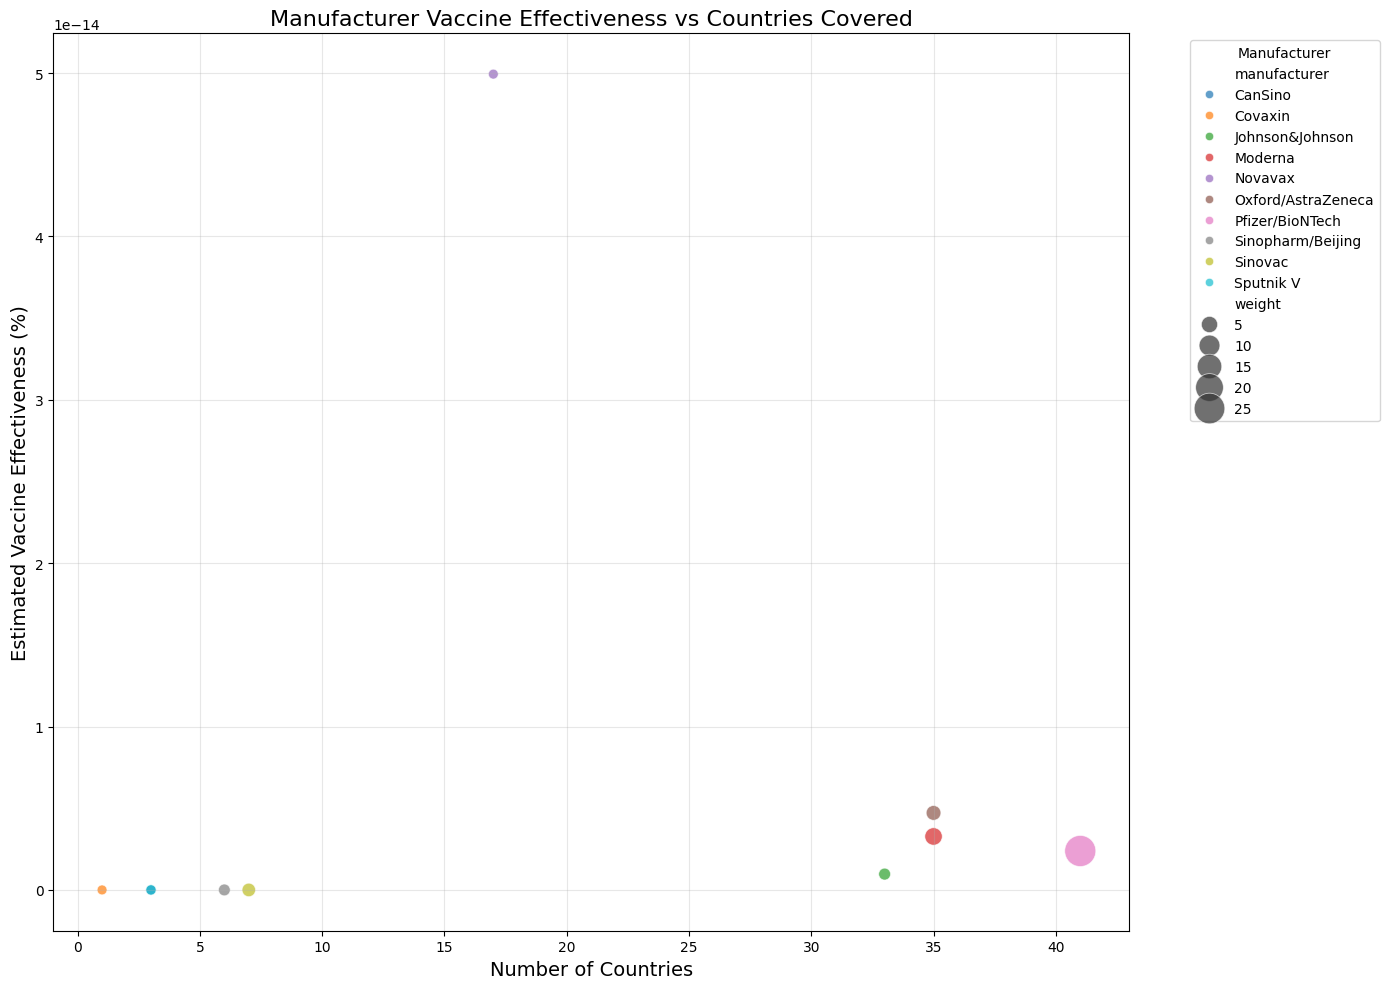

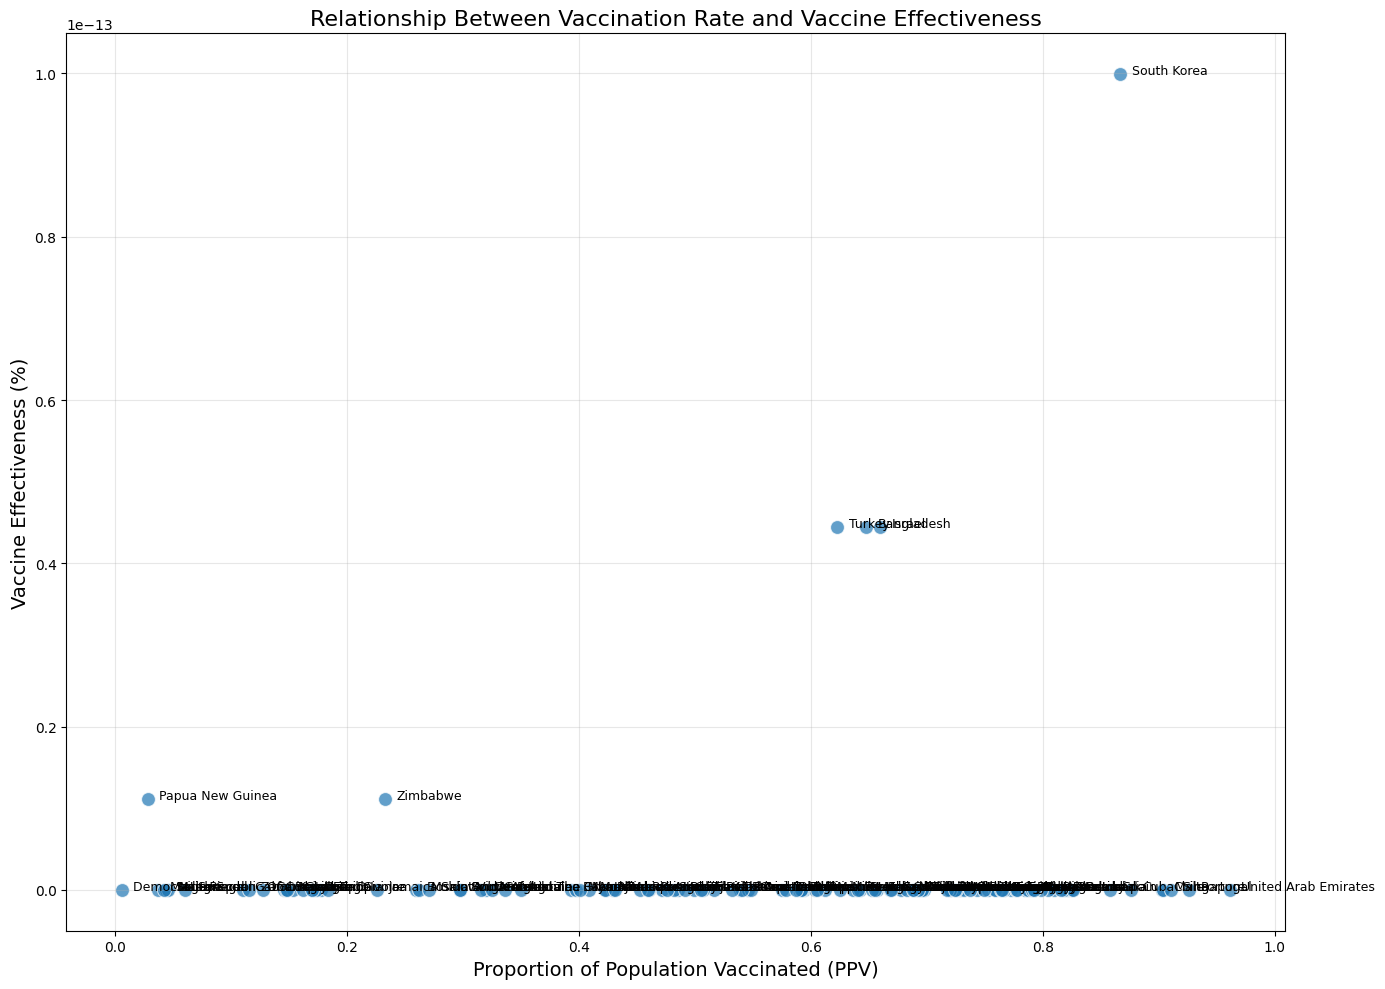

In [56]:
# Create visualizations for vaccine effectiveness

# 1. Country-level VE bar chart (top 20 countries)
plt.figure(figsize=(16, 10))
top_countries = country_ve.sort_values('vaccine_effectiveness_pct', ascending=False).head(20)
sns.barplot(x='vaccine_effectiveness_pct', y='country', data=top_countries, palette='viridis')
plt.title('Estimated Vaccine Effectiveness by Country (Top 20)', fontsize=16)
plt.xlabel('Vaccine Effectiveness (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_countries['vaccine_effectiveness_pct']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()

# 2. Manufacturer-level VE bar chart
plt.figure(figsize=(16, 10))
manu_data = manufacturer_ve.sort_values('estimated_ve_pct', ascending=False)
sns.barplot(x='estimated_ve_pct', y='manufacturer', data=manu_data, palette='viridis')
plt.title('Estimated Vaccine Effectiveness by Manufacturer', fontsize=16)
plt.xlabel('Estimated Vaccine Effectiveness (%)', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(manu_data['estimated_ve_pct']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()

# 3. Scatter plot of VE vs Number of Countries
plt.figure(figsize=(14, 10))
sns.scatterplot(x='country', y='estimated_ve_pct', 
                size='weight', hue='manufacturer',
                sizes=(50, 500), alpha=0.7, data=manufacturer_ve)
plt.title('Manufacturer Vaccine Effectiveness vs Countries Covered', fontsize=16)
plt.xlabel('Number of Countries', fontsize=14)
plt.ylabel('Estimated Vaccine Effectiveness (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Relationship between country vaccination rate and VE
plt.figure(figsize=(14, 10))
sns.scatterplot(x='ppv', y='vaccine_effectiveness_pct', 
                data=country_ve, alpha=0.7, s=100)
plt.title('Relationship Between Vaccination Rate and Vaccine Effectiveness', fontsize=16)
plt.xlabel('Proportion of Population Vaccinated (PPV)', fontsize=14)
plt.ylabel('Vaccine Effectiveness (%)', fontsize=14)
plt.grid(True, alpha=0.3)

# Add country labels to points
for i, row in country_ve.iterrows():
    plt.text(row['ppv']+0.01, row['vaccine_effectiveness_pct'], 
             row['country'], fontsize=9)

plt.tight_layout()
plt.show()

## PCV Calculation Approach

In calculating Vaccine Effectiveness (VE) using the screening method, we need two key parameters:
- PPV (Proportion of Population Vaccinated): This is directly available from our data as people_fully_vaccinated_per_hundred
- PCV (Proportion of Cases who are Vaccinated): This requires knowing how many positive cases occurred in vaccinated individuals

Since our dataset doesn't directly provide the vaccination status of cases, we need to estimate PCV using epidemiological principles:

1. **Definition**: PCV = Number of positive cases who are vaccinated / Total number of positive cases
2. **Challenge**: We only have overall positivity rates, not broken down by vaccination status
3. **Approach**: We use the formula: PCV = (PPV × positive rate in vaccinated) / overall positive rate, which:
   - Accounts for the proportion of the population vaccinated (PPV)
   - Factors in that vaccinated individuals typically have lower positivity rates
   - Normalizes by the overall positivity rate in the population

For our implementation, we estimate that the positive rate among vaccinated individuals is approximately 30% of the overall positive rate, based on epidemiological studies showing substantial reductions in infection risk post-vaccination. This factor can be adjusted based on more specific data about vaccine performance.